# **My First Machine Learning Project Part 1: Getting Started**

## **1. Introduction**

Before everything else, you should know what dataset you are going to use and the questions you are trying to answer using the data set with the help of machine learning.

A typical machine learning project has the following steps:

1. Get the data: Explore it to understand the task at hand
2. Preprocess the data
3. Decide what kind of machine learning model is required depending on the task at hand
4. Initialize the model with the necessary parameters
5. Train the model(s)
6. Evaluate the model(s) with a test dataset
7. Deploy the model if the performance is good enough, Otherwise go back to 2 or 3 or 4 as appropriate.

## **2. Our Dataset**

For our first machine learning project, we are trying to predict the type of Iris flower, using some measurements of the flower. There are 3 types of Iris flowers we are considering in our dataset

1. Iris Versicolor
2. Iris Setosa
3. Iris Virginica

Those are the 'labels' of our machine learning task.

**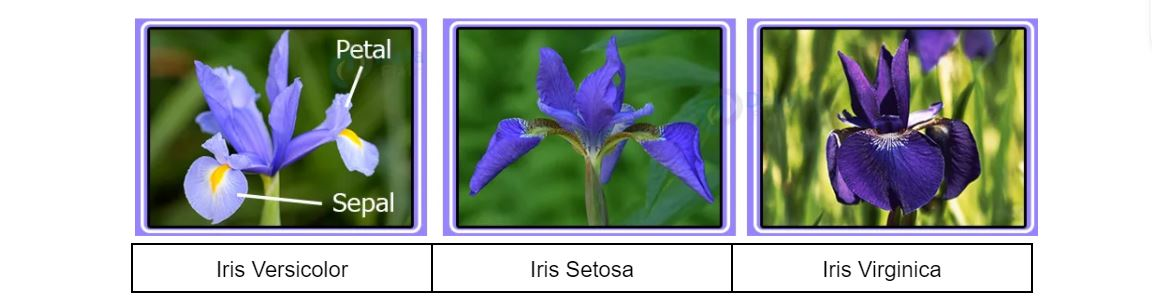**

This dataset was prepared by R. A. Fischer, way back in 1936! It doesn’t contain photos of flowers. Instead, it contains the following measurements of individual flowers:

1. Sepal length
2. Sepal width
3. Petal length
4. Petal width

Those are the attributes or features of our machine learning task. All measurements are in centimeters and the dataset contains such measurements for 150 flowers belonging to the above three subtypes of Iris. It’s one of the most popular datasets for developing and evaluating machine learning algorithms.

## **3. Getting started with your Python Environment**

You can use your favorite python IDE for your machine learning project. However it's important to note that Google Colab is increasingly popular among ML enthusiasts, mainly because it provides a hassle free rapid start. It is a Jupyter notebook-like programming environment with a large number of standard libraries preinstalled. It also allows you to run your code either on your local machine or in the cloud, allowing you to leverage GPU based computation for better performance for some algorithms.

- https://colab.research.google.com

Once you open your editor, you can start your python script with the necessary packages imported. The following code block shows some of the typical python libraries used for data handling, plotting and visualization

**Importing Necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

Let's look at some of the above libraries in a bit more detail

- **NumPy** offers comprehensive mathematical functions, random number generators, linear algebra routines etc. It is one of the fundamental scientific libraries.

- **Pandas** is a fast, powerful, flexible and easy to use library for data analysis and manipulation.

- **Matplotlib** is a comprehensive library for creating static, animated and interactive visualizations.

- **Seaborn** is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

The command **`%matplotlib inline`** allows the plots to be visualized directly inside the python notebook you are coding on.

Apart from the above, we will also be using Scikit-learn, which is a comprehensive machine learning library that includes implementations of several machine learning algorithms and support functions for training and evaluating machine learning models.

## **4. Exploring the data**

Let’s get our hands on the dataset and see what's in there!

**Load the data**

The following code can be used to download the data and load it into a data structure called a DataFrame defined in

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url,names = col_name)

Pandas. provides a function called **`head()`** to print the top five rows of the **`dataset.print(dataset.shape)`**

In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.max()

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
class           Iris-virginica
dtype: object

***Looking at the top five rows of the dataset***

Pandas provides a function called **`head(`)** to print the top five rows of the dataset.

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**Look at some summary statistics of the dataset**

Pandas provides a function called **`describe()`** to compute and print out summary statistics for each class, such as the number of data points, mean value, standard deviation, minimum value, maximum value and the quartiles.

In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**See what data types we are dealing with, and the memory usage of the dataset**

Pandas provides a function called **`info()`** that prints out the data type of each column andthe memory usage.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**The number of classes and the number of examples**

Pandas provides a function called `value_counts()` to show us the number of examples in each class.

The `value_counts()` functions should be called on the column that contains the class labels. That is obtained by `dataset['class']`, on which the `value_counts()` function should be called.

In [ ]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**Violin Plots**

Sometimes, the summary statistics such as mean, standard deviation and median are not enough to understand a dataset. Are the values clustered around the median? Are they spread out normally or skewed to one side? A **violin plot** can help you to answer these questions. This can show you peaks of the data and visualizes the distribution of the dataset.

The best way to understand what a **violin plot** shows is to try it out on our dataset.

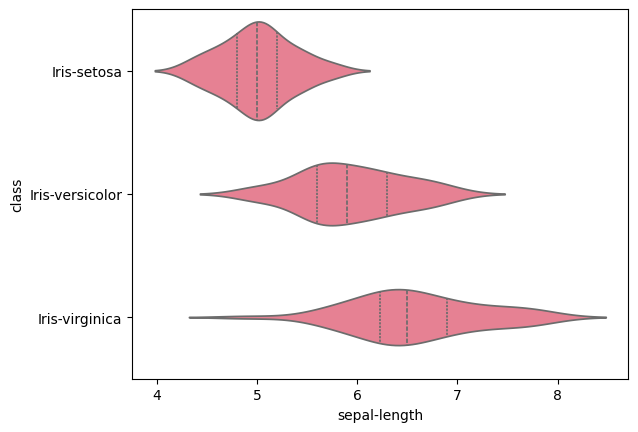

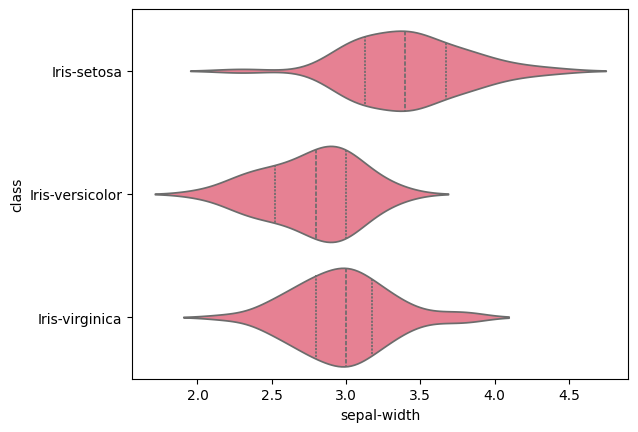

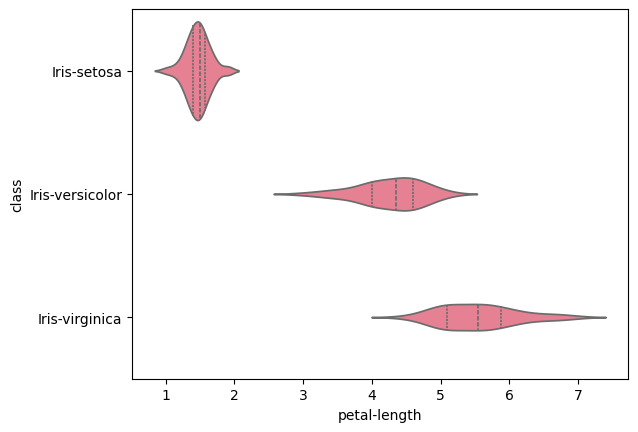

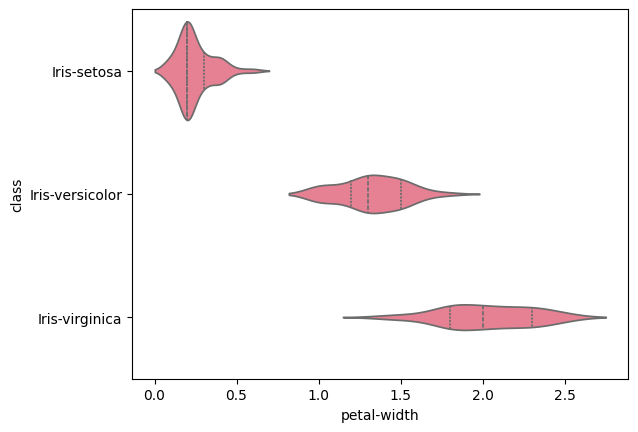

In [ ]:
# Violin Plot
sns.violinplot(y='class', x='sepal-length', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='petal-length', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

Let's focus on the top right violin plot that shows the distributions of the attribute **“petal length”**. We can observe that for Iris Setosa, the petal length is distributed between 1 cm and 2 cm with a larger proportion of the flowers having a measurement near the median value. The other two types of Iris have a flatter and longer distributions of petal length with Iris Virginica having the longest distribution with a long thin tail.

**Correlation Heatmap**

Correlation between two attributes tells you about the interdependency between the two attributes. A correlation heatmap shows a 2D visualization of such interdependencies between each pair of attributes. Whether two attributes are highly correlated or not is reflected by the colors of the heatmap. The following code block can be used to plot the correlation heatmap for our dataset.

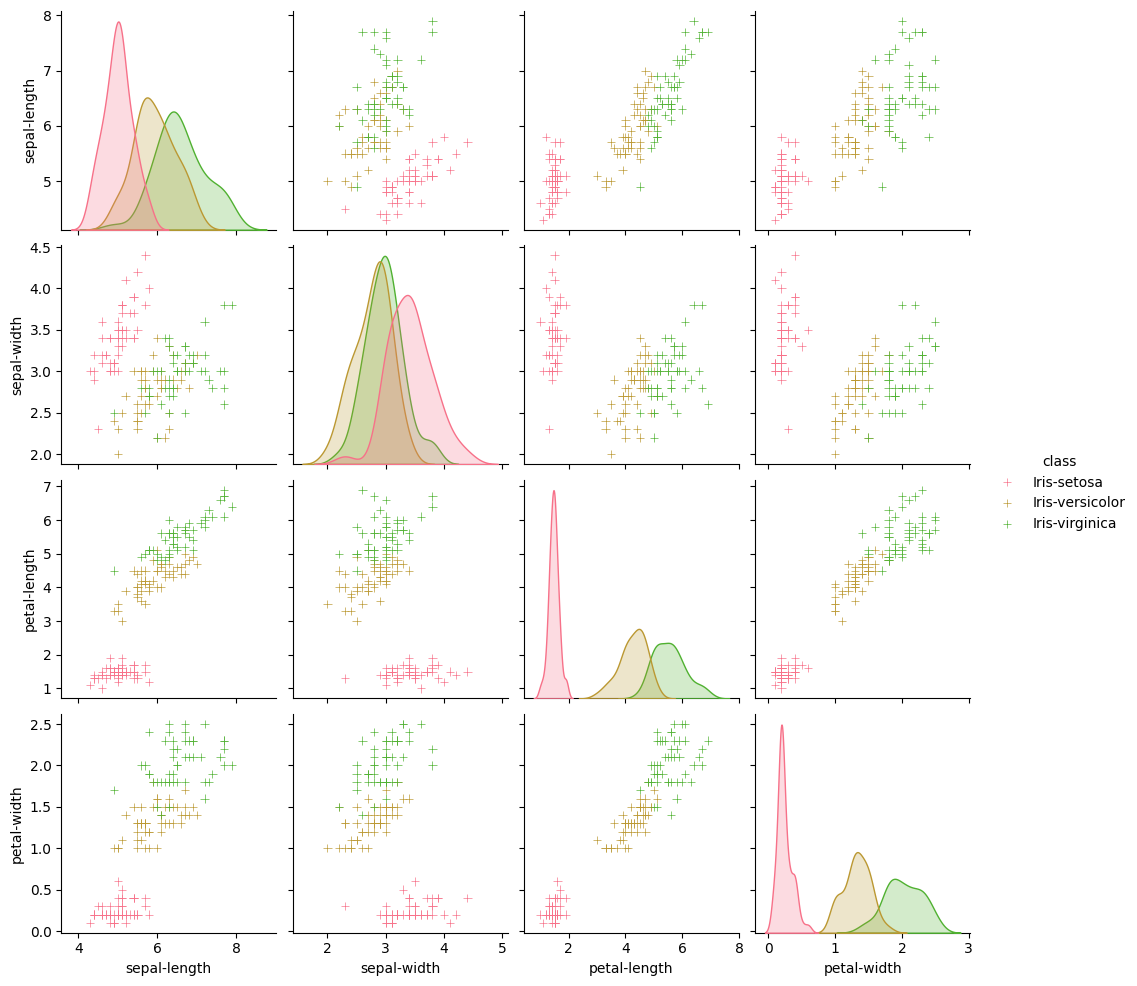

In [ ]:
# Pair Plot
sns.pairplot(dataset, hue='class', markers='+')

plt.show()

If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**Correlation Heatmap**

In the first line we specify the size of the figure, in inches. In this case the width is 7 inches and the height is 5 inches. Then we call the heatmap function of Seaborn, to which we pass the correlation matrix of the attributes of the dataset. The calculation of the correlation matrix is achieved by calling the `corr()` function on the dataset. The cmap variable sets the type of color map we would like to see on the heatmap. Here we have specified `cmap='cubehelix_r'`. Have a look at the documentation of the Seaborn library to find out the other kinds of color maps that are available for producing a colorful correlation heatmap.



<ipython-input-40-42416a67bb00>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='jet')


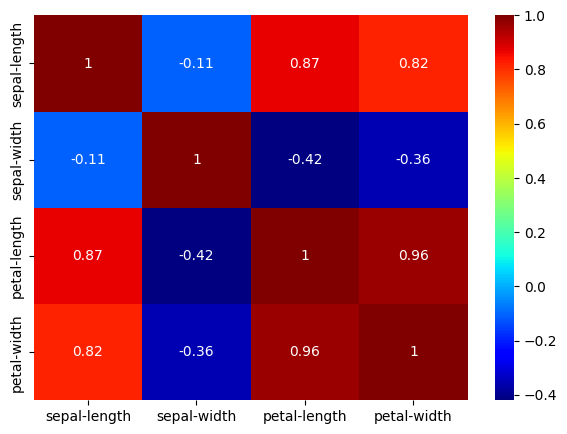

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(7,5))

sns.heatmap(dataset.corr(), annot=True, cmap='jet')
plt.show()

**Summary**

In this lesson we learned how to get started with a **Machine Learning Project** by loading a dataset and exploring the data to increase our understanding of the dataset. We got to know some commonly used **Python Libraries** such as **NumPy**, **Pandas**, **Matplotlib** and **Seaborn**. We also learned how to compute, print and visualize insightful information about our dataset. In the next lesson, we will learn how to build a machine learning model to classify a new set of readings of a new **Iris flower** into the correct subtype.